<a href="https://colab.research.google.com/github/pranavpatil450/Electric-Vehicle-Range-Prediciton/blob/main/ELECTRIC_VEHICLE_PREDICTION_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
import pickle

In [ ]:
data=pd.read_csv('evdataset.csv')
data.head()

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [ ]:
data.describe()

,id,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,1526.257732,343.247423,247.500000,293.144330,502.706186,315.721649,393.608247,7.870619,177.015464,345.592784,...,44.396907,528.711340,4702.087629,1880.061856,1620.706186,2899.829897,2633.139175,619.257732,507.190722,5.536082
std,154.958947,92.173078,75.553656,84.558652,138.297461,98.967440,117.054175,3.168385,38.110213,101.384377,...,15.617918,256.219808,378.219208,68.719346,152.249425,238.567154,415.592250,199.938995,192.411664,1.530768
min,1116.000000,135.000000,95.000000,115.000000,210.000000,125.000000,160.000000,2.800000,125.000000,135.000000,...,24.000000,150.000000,3631.000000,1622.000000,1378.000000,2322.000000,1300.000000,245.000000,171.000000,4.000000
25%,1437.250000,280.000000,185.000000,230.000000,395.000000,230.000000,295.000000,5.400000,150.000000,265.000000,...,34.000000,312.500000,4469.750000,1837.000000,1519.750000,2764.000000,2310.000000,497.000000,405.000000,5.000000
50%,1557.500000,350.000000,250.000000,300.000000,515.000000,320.000000,400.000000,7.400000,160.000000,352.500000,...,46.000000,470.000000,4694.000000,1887.000000,1614.000000,2900.000000,2660.000000,572.500000,472.500000,5.000000
75%,1648.750000,403.750000,295.000000,345.000000,595.000000,375.000000,470.000000,9.650000,200.000000,410.000000,...,51.750000,650.000000,4959.000000,1920.750000,1652.000000,3082.500000,2968.750000,645.000000,558.250000,5.000000
max,1757.000000,595.000000,470.000000,535.000000,895.000000,615.000000,740.000000,19.100000,261.000000,640.000000,...,110.000000,1170.000000,5391.000000,2011.000000,1927.000000,3430.000000,3500.000000,1121.000000,1410.000000,9.000000


In [ ]:
#Finding correlation

corr_matrix = data.corr(numeric_only=True)
corr_matrix["Electric Range"].sort_values(ascending=False)

,Electric Range
Electric Range,1.000000
Combined - Mild Weather,0.999340
Combined - Cold Weather,0.999298
Highway - Cold Weather,0.999215
Highway - Mild Weather,0.998401
City - Mild Weather,0.998262
City - Cold Weather,0.995611
Battery Capacity,0.863062
Top Speed,0.706707
Fastcharge Speed,0.701595


In [ ]:
#Checking for null values

data.nunique()

,0
id,194
Make,34
link,194
City - Cold Weather,64
Highway - Cold Weather,52
Combined - Cold Weather,57
City - Mild Weather,82
Highway - Mild Weather,59
Combined - Mild Weather,67
Acceleration 0 - 100 km/h,72


In [ ]:
data.shape

(194, 27)

In [ ]:
#Converting categorical data into numerical data

data.replace({'Drive':{'Rear':2,'Front':0,'AWD':1}},inplace=True)

<ipython-input-69-b6aa740eafd6>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'Drive':{'Rear':2,'Front':0,'AWD':1}},inplace=True)


In [ ]:
#Dropping few features

cols_to_use=['City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather','Combined - Mild Weather','Acceleration 0 - 100 km/h','Top Speed','Electric Range','Total Power','Total Torque','Drive','Battery Capacity','Charge Power','Charge Speed','Fastcharge Speed','Gross Vehicle Weight (GVWR)','Max. Payload','Cargo Volume','Width','Length']
data=data[cols_to_use]
data.head()

,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,...,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Width,Length
0,390,275,330,575,355,445,7.8,185,390,168,...,2,77.4,11.0,49,1020,2495,595,432,1890,4515
1,330,235,280,480,300,375,6.2,160,330,215,...,1,69.7,11.0,46,470,2580,480,495,1834,4684
2,400,305,350,580,385,470,3.2,260,415,500,...,1,93.4,11.0,46,1020,2880,575,366,1966,4963
3,445,340,390,670,440,540,5.7,190,470,250,...,2,83.9,11.0,54,730,2605,555,470,1852,4783
4,440,320,380,660,415,520,7.9,160,450,150,...,2,82.0,11.0,55,570,2300,447,385,1809,4261


In [ ]:
data.isna().sum()

,0
City - Cold Weather,0
Highway - Cold Weather,0
Combined - Cold Weather,0
City - Mild Weather,0
Highway - Mild Weather,0
Combined - Mild Weather,0
Acceleration 0 - 100 km/h,0
Top Speed,0
Electric Range,0
Total Power,0


In [ ]:
x=data.drop(['Electric Range','City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather',
'Combined - Mild Weather'],axis=1)
y=data[['Electric Range','City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather',
'Combined - Mild Weather']]

In [ ]:
x.shape

(194, 14)

In [ ]:
x

,Acceleration 0 - 100 km/h,Top Speed,Total Power,Total Torque,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Width,Length
0,7.8,185,168,350,2,77.4,11.0,49,1020,2495,595,432,1890,4515
1,6.2,160,215,520,1,69.7,11.0,46,470,2580,480,495,1834,4684
2,3.2,260,500,850,1,93.4,11.0,46,1020,2880,575,366,1966,4963
3,5.7,190,250,430,2,83.9,11.0,54,730,2605,555,470,1852,4783
4,7.9,160,150,310,2,82.0,11.0,55,570,2300,447,385,1809,4261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2.8,260,560,1050,1,93.4,11.0,45,980,2870,575,366,1966,4963
190,7.9,160,150,310,2,82.0,11.0,55,570,2280,420,385,1809,4261
191,11.7,135,100,260,0,50.0,7.4,27,310,2440,639,806,1921,4753
192,6.2,180,220,460,1,82.0,11.0,49,500,2715,575,535,1865,4588


In [ ]:
#Normalizing the given data

from sklearn import preprocessing
x=preprocessing.normalize(x)

In [ ]:
x

array([[1.37978718e-03, 3.27257217e-02, 2.97184932e-02, ...,
        7.64189825e-02, 3.34333049e-01, 7.98684505e-01],
       [1.07919159e-03, 2.78501057e-02, 3.74235795e-02, ...,
        8.61612644e-02, 3.19231836e-01, 8.15311844e-01],
       [5.10145768e-04, 4.14493436e-02, 7.97102762e-02, ...,
        5.83479222e-02, 3.13420806e-01, 7.91204202e-01],
       ...,
       [2.02180966e-03, 2.33285730e-02, 1.72804244e-02, ...,
        1.39280221e-01, 3.31956953e-01, 8.21338572e-01],
       [1.07817561e-03, 3.13018724e-02, 3.82578441e-02, ...,
        9.30361209e-02, 3.24322178e-01, 7.97849949e-01],
       [2.27538052e-03, 2.06852775e-02, 1.59117519e-02, ...,
        9.59478640e-02, 3.05505637e-01, 7.88586424e-01]])

In [ ]:
y

,Electric Range,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather
0,390,390,275,330,575,355,445
1,330,330,235,280,480,300,375
2,415,400,305,350,580,385,470
3,470,445,340,390,670,440,540
4,450,440,320,380,660,415,520
...,...,...,...,...,...,...,...
189,400,390,290,340,560,370,450
190,450,440,320,380,660,415,515
191,195,210,140,170,295,170,220
192,400,395,290,340,580,370,460


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
#Using Linear Regression

from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,Y_train)

In [ ]:
pickle.dump(reg, open('model.pkl','wb'))

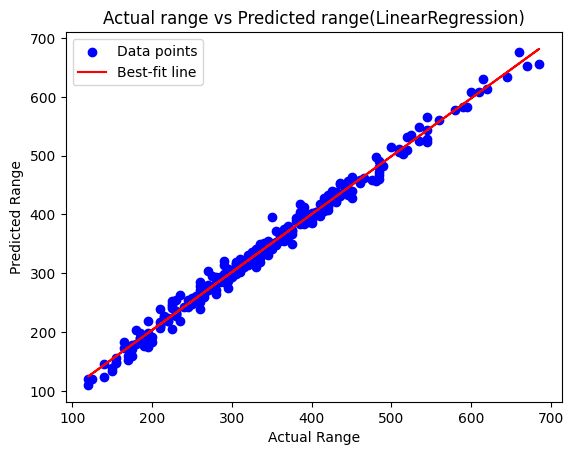

In [ ]:
testing_data_prediction=reg.predict(X_test)

Y_test_flat = np.array(Y_test).flatten()
testing_data_prediction_flat = np.array(testing_data_prediction).flatten()

plt.scatter(Y_test,testing_data_prediction, color='blue', label='Data points')
slope, intercept = np.polyfit(Y_test_flat, testing_data_prediction_flat, 1)
best_fit_line = slope * Y_test_flat + intercept
plt.plot(Y_test_flat, best_fit_line, color='red', label='Best-fit line')

plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(LinearRegression)")

plt.legend()


plt.show()

In [ ]:
mae = mean_absolute_error(Y_test,testing_data_prediction)
mae

8.955062916841127

In [ ]:
mse = mean_squared_error(Y_test,testing_data_prediction)
mse
rmae = np.sqrt(mse)
print("Mean squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmae)

Mean squared Error (MSE): 137.5615299804312
Root Mean Squared Error (RMSE): 11.728662753290811


In [ ]:
r_squared = r2_score(Y_test, testing_data_prediction)
print("R-squared (R²):", r_squared)

R-squared (R²): 0.9807699956982463


In [ ]:
from sklearn.metrics import confusion_matrix


threshold = 0.5
Y_pred_class = np.where(np.array(testing_data_prediction).flatten() >= threshold, 1, 0)
Y_test_class = np.where(np.array(Y_test).flatten() >= threshold, 1, 0)

cm = confusion_matrix(Y_test_class,Y_pred_class)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


array([[273]])

In [ ]:
accuracy_score = reg.score(X_test,Y_test)
accuracy_score
accuracy_score*100

98.07699956982464

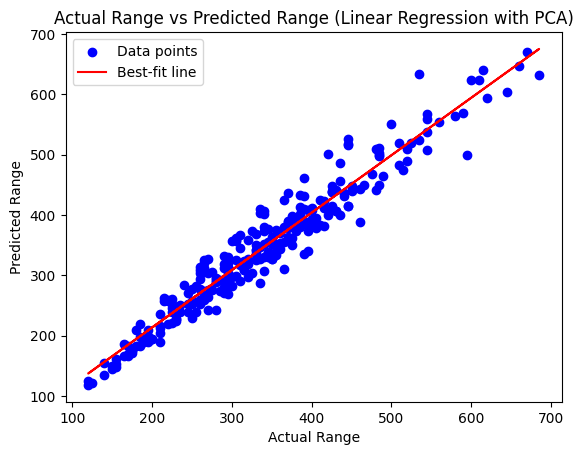

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Using Linear Regression
reg = LinearRegression().fit(X_train_pca, Y_train)
pickle.dump(reg, open('model.pkl', 'wb'))

# Make predictions
testing_data_prediction = reg.predict(X_test_pca)

Y_test_flat = np.array(Y_test).flatten()
testing_data_prediction_flat = np.array(testing_data_prediction).flatten()

# Plotting
plt.scatter(Y_test_flat, testing_data_prediction_flat, color='blue', label='Data points')
slope, intercept = np.polyfit(Y_test_flat, testing_data_prediction_flat, 1)
best_fit_line = slope * Y_test_flat + intercept
plt.plot(Y_test_flat, best_fit_line, color='red', label='Best-fit line')

plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual Range vs Predicted Range (Linear Regression with PCA)")

plt.legend()
plt.show()


In [ ]:
maef = mean_absolute_error(Y_test_flat,testing_data_prediction_flat)
maef

msef = mean_squared_error(Y_test_flat,testing_data_prediction_flat)
msef
rmae = np.sqrt(msef)

r_squared_f = r2_score(Y_test_flat, testing_data_prediction_flat)


print("Mean Absolute Error (MAE):",mae)
print("Mean squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmae)
print("R-squared (R²):", r_squared_f)

Mean Absolute Error (MAE): 8.955062916841127
Mean squared Error (MSE): 137.5615299804312
Root Mean Squared Error (RMSE): 28.739451337138377
R-squared (R²): 0.9352679549405156


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=15),
}

forest_reg=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_distribs,n_iter=10,cv=5,scoring="neg_mean_squared_error",
                              random_state=42)
rnd_search.fit(X_train,Y_train)
best_forest_reg = rnd_search.best_estimator_

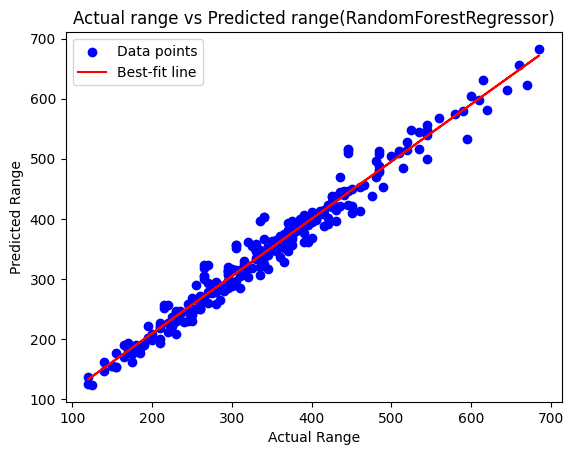

In [ ]:
testing_data_prediction1=rnd_search.predict(X_test)

Y_test_flat = np.array(Y_test).flatten()
testing_data_prediction_flat = np.array(testing_data_prediction1).flatten()

plt.scatter(Y_test,testing_data_prediction1, color='blue', label='Data points')
slope, intercept = np.polyfit(Y_test_flat, testing_data_prediction_flat, 1)
best_fit_line = slope * Y_test_flat + intercept
plt.plot(Y_test_flat, best_fit_line, color='red', label='Best-fit line')


plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(RandomForestRegressor)")

plt.legend()

plt.show()

In [ ]:
mae1 = mean_absolute_error(Y_test,testing_data_prediction1)
mae1

14.015206284943128

In [ ]:
mse1 = mean_squared_error(Y_test,testing_data_prediction1)
rmae = np.sqrt(mse1)
print("Mean squared Error (MSE):", mse1)
print("Root Mean Squared Error (RMSE):", rmae)

Mean squared Error (MSE): 415.3070437036416
Root Mean Squared Error (RMSE): 20.37908348536905


In [ ]:
r_squared = r2_score(Y_test, testing_data_prediction1)
print("R-squared (R²):", r_squared)

R-squared (R²): 0.9438049071506828


In [ ]:
accuracy_score1 = rnd_search.score(X_test,Y_test)
accuracy_scoree = - accuracy_score1
accuracy_scoree

415.3070437036416

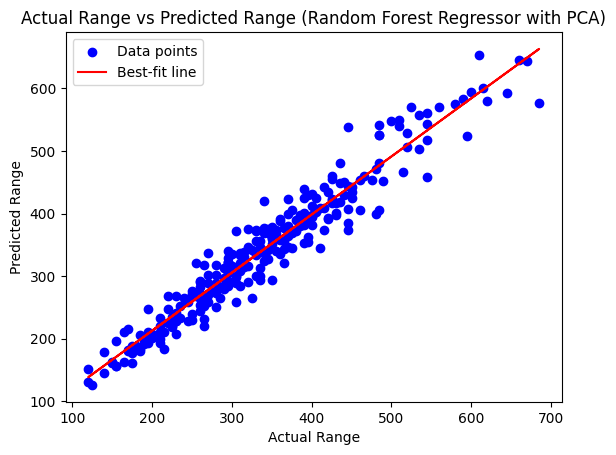

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Set up parameter distributions for RandomizedSearchCV
param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=15),
}

# Initialize and fit Random Forest Regressor with RandomizedSearchCV
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=10, cv=5,
                                 scoring="neg_mean_squared_error", random_state=42)
rnd_search.fit(X_train_pca, Y_train)

# Get the best estimator and make predictions
best_forest_reg = rnd_search.best_estimator_
testing_data_prediction1 = best_forest_reg.predict(X_test_pca)

# Prepare for plotting
Y_test_flat = np.array(Y_test).flatten()
testing_data_prediction_flat = np.array(testing_data_prediction1).flatten()

# Plotting
plt.scatter(Y_test_flat, testing_data_prediction_flat, color='blue', label='Data points')
slope, intercept = np.polyfit(Y_test_flat, testing_data_prediction_flat, 1)
best_fit_line = slope * Y_test_flat + intercept
plt.plot(Y_test_flat, best_fit_line, color='red', label='Best-fit line')

plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual Range vs Predicted Range (Random Forest Regressor with PCA)")

plt.legend()
plt.show()


In [ ]:
maef = mean_absolute_error(Y_test_flat,testing_data_prediction_flat)
maef

msef = mean_squared_error(Y_test_flat,testing_data_prediction_flat)
msef
rmae = np.sqrt(msef)

r_squared_f = r2_score(Y_test_flat, testing_data_prediction_flat)


print("Mean Absolute Error (MAE):",mae)
print("Mean squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmae)
print("R-squared (R²):", r_squared_f)

Mean Absolute Error (MAE): 8.955062916841127
Mean squared Error (MSE): 137.5615299804312
Root Mean Squared Error (RMSE): 28.844712601358072
R-squared (R²): 0.9347929107299775


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid=[
        {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
        {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

rfc=RandomForestClassifier()
grid_search=GridSearchCV(rfc,param_grid,cv=5,scoring="neg_mean_squared_error",
                              return_train_score=True)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
rfc_clf=grid_search.best_estimator_
rfc_clf

RandomForestClassifier(max_features=8, n_estimators=30)

In [ ]:
rfc_clf_predictions=rfc_clf.predict(X_test)

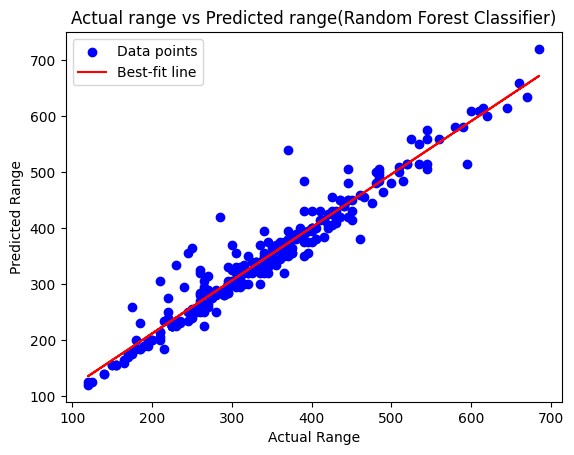

In [ ]:
testing_data_prediction2=rfc_clf.predict(X_test)


Y_test_flat = np.array(Y_test).flatten()
testing_data_prediction_flat = np.array(testing_data_prediction2).flatten()

plt.scatter(Y_test,testing_data_prediction2, color='blue', label='Data points')
slope, intercept = np.polyfit(Y_test_flat, testing_data_prediction_flat, 1)
best_fit_line = slope * Y_test_flat + intercept
plt.plot(Y_test_flat, best_fit_line, color='red', label='Best-fit line')



plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Random Forest Classifier)")

plt.legend()
plt.show()

In [ ]:
mae2 = mean_absolute_error(Y_test,rfc_clf_predictions)
mae2

15.750915750915752

In [ ]:
mse2 = mean_squared_error(Y_test,rfc_clf_predictions)
rmae = np.sqrt(mse2)
print("Mean squared Error (MSE):", mse2)
print("Root Mean Squared Error (RMSE):", rmae)

Mean squared Error (MSE): 782.0512820512821
Root Mean Squared Error (RMSE): 27.965179814392076


In [ ]:
r_squared = r2_score(Y_test,rfc_clf_predictions)
print("R-squared (R²):", r_squared)

R-squared (R²): 0.8939876516813088


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


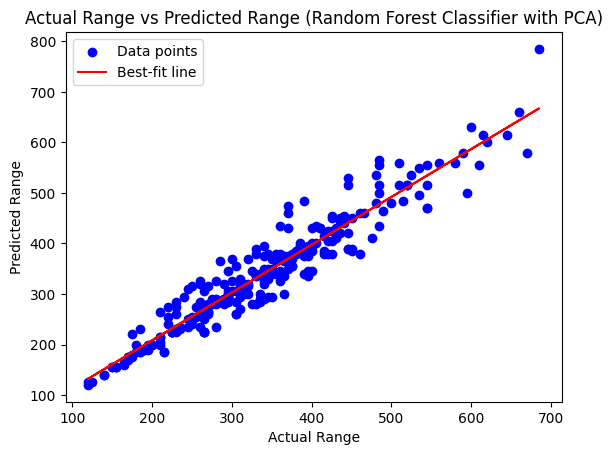

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Set up parameter grid for GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

# Initialize Random Forest Classifier and GridSearchCV
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train_pca, Y_train)

# Use the best estimator to make predictions
best_rfc = grid_search.best_estimator_
testing_data_prediction2 = best_rfc.predict(X_test_pca)

# Prepare for plotting
Y_test_flat = np.array(Y_test).flatten()
testing_data_prediction_flat = np.array(testing_data_prediction2).flatten()

# Plotting
plt.scatter(Y_test_flat, testing_data_prediction_flat, color='blue', label='Data points')
slope, intercept = np.polyfit(Y_test_flat, testing_data_prediction_flat, 1)
best_fit_line = slope * Y_test_flat + intercept
plt.plot(Y_test_flat, best_fit_line, color='red', label='Best-fit line')

plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual Range vs Predicted Range (Random Forest Classifier with PCA)")

plt.legend()
plt.show()


In [ ]:
maef = mean_absolute_error(Y_test_flat,testing_data_prediction_flat)
maef

msef = mean_squared_error(Y_test_flat,testing_data_prediction_flat)
msef
rmae = np.sqrt(msef)

r_squared_f = r2_score(Y_test_flat, testing_data_prediction_flat)


print("Mean Absolute Error (MAE):",mae)
print("Mean squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmae)
print("R-squared (R²):", r_squared_f)

Mean Absolute Error (MAE): 8.955062916841127
Mean squared Error (MSE): 137.5615299804312
Root Mean Squared Error (RMSE): 32.919593461943506
R-squared (R²): 0.9150680082773072


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=42)

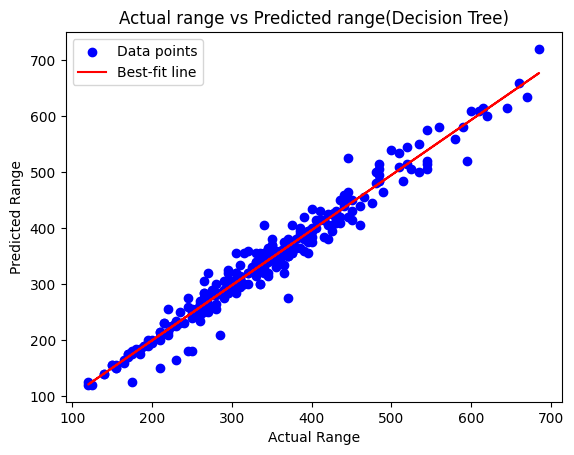

In [ ]:
testing_data_prediction3=tree_reg.predict(X_test)


Y_test_flat = np.array(Y_test).flatten()
testing_data_prediction_flat = np.array(testing_data_prediction3).flatten()

plt.scatter(Y_test,testing_data_prediction3, color='blue', label='Data points')
slope, intercept = np.polyfit(Y_test_flat, testing_data_prediction_flat, 1)
best_fit_line = slope * Y_test_flat + intercept
plt.plot(Y_test_flat, best_fit_line, color='red', label='Best-fit line')



plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range(Decision Tree)")

plt.legend()
plt.show()

In [ ]:
testing_data_prediction3=tree_reg.predict(X_test)
mae3 = mean_absolute_error(Y_test,testing_data_prediction3)
mae3

14.505494505494507

In [ ]:
accuracy_score3 = tree_reg.score(X_test,Y_test)
accuracy_score3*100

93.59052528548403

In [ ]:
mse3 = mean_squared_error(Y_test,testing_data_prediction3)
rmae = np.sqrt(mse3)
print("Mean squared Error (MSE):", mse3)
print("Root Mean Squared Error (RMSE):", rmae)

Mean squared Error (MSE): 470.5128205128205
Root Mean Squared Error (RMSE): 21.691307487397353


In [ ]:
r_squared = r2_score(Y_test,testing_data_prediction3)
print("R-squared (R²):", r_squared)

R-squared (R²): 0.9359052528548403


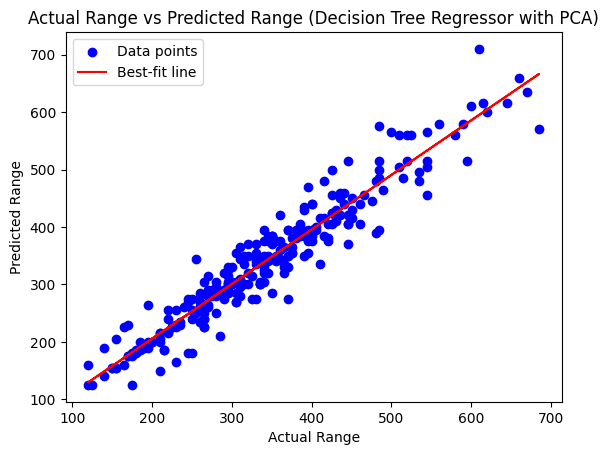

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize and fit the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train_pca, Y_train)

# Make predictions
testing_data_prediction3 = tree_reg.predict(X_test_pca)

# Prepare for plotting
Y_test_flat = np.array(Y_test).flatten()
testing_data_prediction_flat = np.array(testing_data_prediction3).flatten()

# Plotting
plt.scatter(Y_test_flat, testing_data_prediction_flat, color='blue', label='Data points')
slope, intercept = np.polyfit(Y_test_flat, testing_data_prediction_flat, 1)
best_fit_line = slope * Y_test_flat + intercept
plt.plot(Y_test_flat, best_fit_line, color='red', label='Best-fit line')

plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual Range vs Predicted Range (Decision Tree Regressor with PCA)")

plt.legend()
plt.show()


In [ ]:
maef = mean_absolute_error(Y_test_flat,testing_data_prediction_flat)
maef

msef = mean_squared_error(Y_test_flat,testing_data_prediction_flat)
msef
rmae = np.sqrt(msef)

r_squared_f = r2_score(Y_test_flat, testing_data_prediction_flat)


print("Mean Absolute Error (MAE):",mae)
print("Mean squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmae)
print("R-squared (R²):", r_squared_f)

Mean Absolute Error (MAE): 8.955062916841127
Mean squared Error (MSE): 137.5615299804312
Root Mean Squared Error (RMSE): 32.926547179403876
R-squared (R²): 0.9150321235419164


In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
testing_data_prediction4=forest_reg.predict(X_test)
mae4 = mean_absolute_error(Y_test,testing_data_prediction4)
mae4

15.524175824175826

In [ ]:
accuracy_score3 = forest_reg.score(X_test,Y_test)
accuracy_score3*100

91.53077305568517

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load dataset
df = pd.read_csv('/content/evdataset.csv')

# Preview the dataset
print(df.head())

# Define your feature columns (e.g., battery capacity, vehicle weight, etc.)
# Replace 'BatteryCapacity', 'VehicleWeight', etc. with actual column names from your dataset
X = df[['Battery Capacity', 'Gross Vehicle Weight (GVWR)', 'Top Speed', 'Total Power']]  # Example feature columns
y = df['Electric Range']  # Target variable (electric vehicle range)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model (you can choose other models)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Test the model accuracy (optional)
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

# Hardcoded user inputs (modifiable through code)
hardcoded_input = {
    'Battery Capacity': 75,  # kWh
    'Gross Vehicle Weight (GVWR)': 1800,  # kg
    'Top Speed': 160,        # km/h
    'Total Power': 0.85      # km/kWh
}

# Convert hardcoded input to DataFrame for prediction
input_df = pd.DataFrame([hardcoded_input])

# Predict electric range based on the hardcoded input
predicted_range = model.predict(input_df)

print(f"Predicted Electric Range: {predicted_range[0]} km")


     id        Make                                               link  \
0  1647     Genesis  https://ev-database.org/car/1647/Genesis-GV60-...   
1  1493    Mercedes  https://ev-database.org/car/1493/Mercedes-EQB-...   
2  1229     Porsche  https://ev-database.org/car/1229/Porsche-Tayca...   
3  1252         BMW   https://ev-database.org/car/1252/BMW-i4-eDrive40   
4  1534  Volkswagen  https://ev-database.org/car/1534/Volkswagen-ID...   

   City - Cold Weather  Highway - Cold Weather  Combined - Cold Weather  \
0                  390                     275                      330   
1                  330                     235                      280   
2                  400                     305                      350   
3                  445                     340                      390   
4                  440                     320                      380   

   City - Mild Weather  Highway - Mild Weather  Combined - Mild Weather  \
0                  575       

                                   id  City - Cold Weather  \
id                           1.000000             0.148643   
City - Cold Weather          0.148643             1.000000   
Highway - Cold Weather       0.125678             0.993877   
Combined - Cold Weather      0.133956             0.997671   
City - Mild Weather          0.132667             0.995403   
Highway - Mild Weather       0.117581             0.989605   
Combined - Mild Weather      0.122418             0.992702   
Acceleration 0 - 100 km/h   -0.016639            -0.687348   
Top Speed                    0.001646             0.690191   
Electric Range               0.128289             0.995611   
Total Power                  0.000215             0.634454   
Total Torque                 0.076902             0.617320   
Battery Capacity             0.150453             0.892994   
Charge Power                -0.025375             0.387061   
Charge Speed                -0.069925             0.379922   
Fastchar

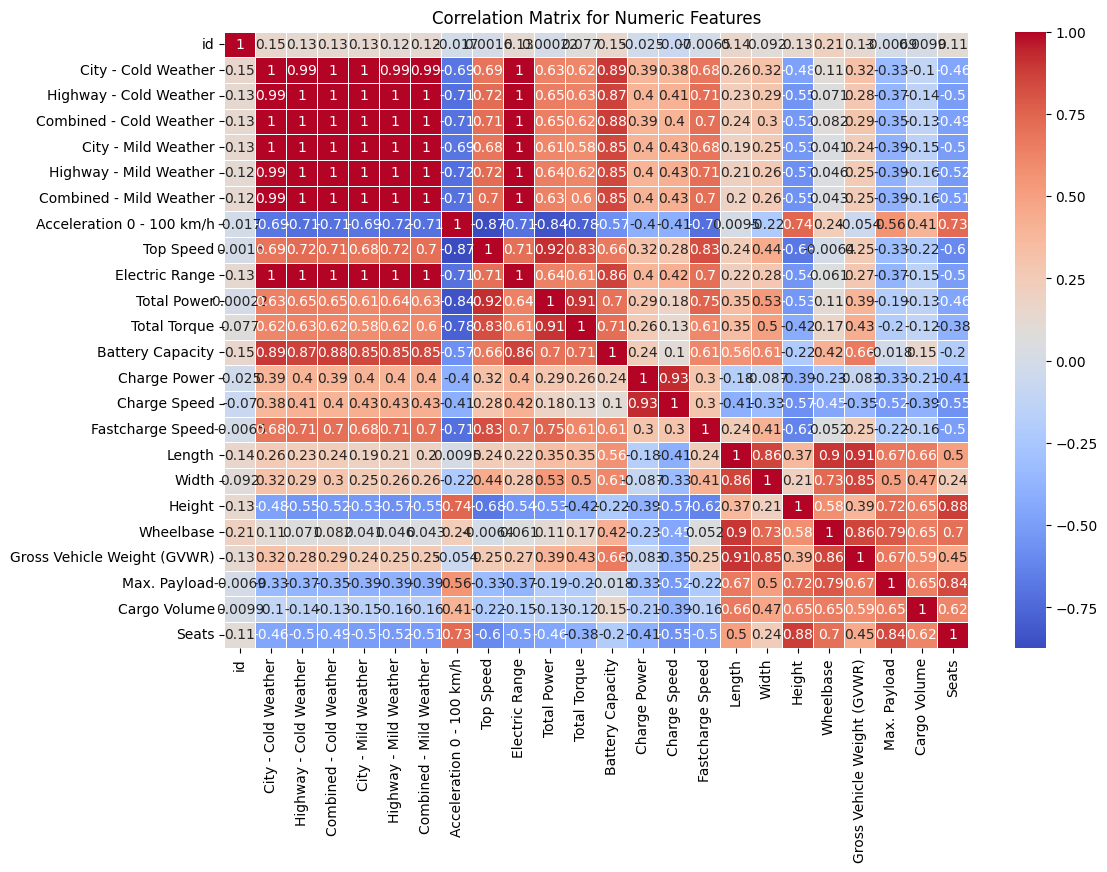

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns (like 'Make', 'link', etc.)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for numeric features
correlation_matrix = numeric_df.corr()

# Display correlation matrix
print(correlation_matrix)

# Extract correlations related to 'Combined - Mild Weather' (Electric Range)
electric_range_corr = correlation_matrix['Combined - Mild Weather'].sort_values(ascending=False)

# Display the top correlated features with Electric Range
print("\nTop correlated features with Electric Range (Combined - Mild Weather):")
print(electric_range_corr)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numeric Features')
plt.show()


In [ ]:
# Let's assume you want to keep features with correlation > 0.5 or < -0.5 with the electric range
relevant_features = electric_range_corr[abs(electric_range_corr) > 0.5].index.tolist()

# Display selected features
print("Selected features for predicting electric range:", relevant_features)

# Filter your dataframe to include only the selected features
X = df[relevant_features]


Selected features for predicting electric range: ['Combined - Mild Weather', 'Electric Range', 'Highway - Mild Weather', 'Highway - Cold Weather', 'City - Mild Weather', 'Combined - Cold Weather', 'City - Cold Weather', 'Battery Capacity', 'Top Speed', 'Fastcharge Speed', 'Total Power', 'Total Torque', 'Seats', 'Height', 'Acceleration 0 - 100 km/h']


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [ ]:
# Load dataset
df = pd.read_csv('/content/evdataset.csv')

# Preview the dataset
print(df.head())


     id        Make                                               link  \
0  1647     Genesis  https://ev-database.org/car/1647/Genesis-GV60-...   
1  1493    Mercedes  https://ev-database.org/car/1493/Mercedes-EQB-...   
2  1229     Porsche  https://ev-database.org/car/1229/Porsche-Tayca...   
3  1252         BMW   https://ev-database.org/car/1252/BMW-i4-eDrive40   
4  1534  Volkswagen  https://ev-database.org/car/1534/Volkswagen-ID...   

   City - Cold Weather  Highway - Cold Weather  Combined - Cold Weather  \
0                  390                     275                      330   
1                  330                     235                      280   
2                  400                     305                      350   
3                  445                     340                      390   
4                  440                     320                      380   

   City - Mild Weather  Highway - Mild Weather  Combined - Mild Weather  \
0                  575       

In [ ]:
# Define the relevant features including weather conditions
relevant_features = [
    'Battery Capacity',
    'Top Speed',
    'Fastcharge Speed',
    'Total Power',
    'Total Torque',
    'Seats',
    'Height',
    'Acceleration 0 - 100 km/h',
    'Highway - Mild Weather',        # Include weather-related features
    'City - Mild Weather',
    'Combined - Mild Weather',
    'Highway - Cold Weather',
    'City - Cold Weather',
    'Combined - Cold Weather'
]


In [ ]:
# Define the target variable (e.g., Electric Range in different weather conditions)
y = df['Electric Range']  # Choose the appropriate target variable

# Define feature matrix X using the relevant features
X = df[relevant_features]


In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Test the model accuracy (optional)
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")


Mean Absolute Error: 3.428205128205126


In [ ]:
# Hardcoded user inputs (modifiable through code)
hardcoded_input = {
    'Battery Capacity': 77.4,               # kWh
    'Top Speed': 185,                     # km/h
    'Fastcharge Speed': 1020,               # kW
    'Total Power': 168,                  # kW/km
    'Total Torque': 350,                  # Nm
    'Seats': 5,                           # number of seats
    'Height': 1580,                        # meters
    'Acceleration 0 - 100 km/h': 7.8,      # seconds
    'Highway - Mild Weather': 355,         # km range in mild weather
    'City - Mild Weather': 575,            # km range in mild weather
    'Combined - Mild Weather': 445,        # km range in mild weather
    'Highway - Cold Weather': 275,         # km range in cold weather
    'City - Cold Weather': 390,             # km range in cold weather
    'Combined - Cold Weather': 330           # km range in cold weather
}


In [ ]:
# Convert hardcoded input to DataFrame for prediction
input_df = pd.DataFrame([hardcoded_input])


In [ ]:
# Predict electric range based on the hardcoded input
predicted_range = model.predict(input_df)

print(f"Predicted Electric Range: {predicted_range[0]} km")


Predicted Electric Range: 388.9 km


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Accuracy:{r2*100}")

Mean Absolute Error (MAE): 3.428205128205126
Mean Squared Error (MSE): 64.16782051282055
R² Score: 0.9943159419825633
Accuracy:99.43159419825633


In [ ]:
from sklearn.metrics import confusion_matrix

# Define bins for electric range
bins = [0, 265, float('inf')]  # Low and Not Low
labels = ['Low', 'Not Low']

# Binning the 'Electric Range' column into 2 categories
df['Electric Range Category'] = pd.cut(df['Electric Range'], bins=bins, labels=labels)


In [ ]:
# Get predicted values from the model
# y_pred = model.predict(X)
# Binning the predicted values based on the new bins
y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)
# Binning the predicted values based on the same bins
# y_pred_binned = pd.cut(y_pred, bins=bins, labels=labels)


In [ ]:
cm = confusion_matrix(df['Electric Range Category'], y_pred_binned)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 53   0]
 [  0 141]]


In [ ]:
from sklearn.metrics import recall_score

# Binning the true and predicted labels into categories
y_true_binned = df['Electric Range Category']
y_pred_binned = pd.cut(model.predict(X), bins=bins, labels=labels)

recall = recall_score(y_true_binned, y_pred_binned, average='weighted')

print(f"Recall: {recall}")

Recall: 1.0


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true_binned, y_pred_binned)

tn, fp, fn, tp = cm.ravel()


print("True Negatives: ", tn)
print("False Positives: ", fp)
print("False Negatives: ", fn)
print("True Positives: ", tp)


specificity = tn / (tn + fp)
print("Specificity: ", specificity)


True Negatives:  53
False Positives:  0
False Negatives:  0
True Positives:  141
Specificity:  1.0


In [ ]:
from sklearn.metrics import precision_score


y_true_binned = df['Electric Range Category']
y_pred_binned = pd.cut(model.predict(X), bins=bins, labels=labels)

# Calculate weighted precision
precision = precision_score(y_true_binned, y_pred_binned, average='weighted')

print(f"Precision: {precision}")


Precision: 1.0


In [ ]:
from sklearn.metrics import f1_score


y_true_binned = df['Electric Range Category']
y_pred_binned = pd.cut(model.predict(X), bins=bins, labels=labels)


f1_score = f1_score(y_true_binned, y_pred_binned, average='weighted')

print(f"F1 Score: {f1_score}")


F1 Score: 1.0


In [ ]:
fpr = fp / (fp + tn)
fpr

0.0

In [ ]:
fnr = fn / (fn + tp)
fnr

0.0

In [ ]:
import numpy as np
residuals = y - model.predict(X)
residuals.describe()

,Electric Range
count,194.000000
mean,0.666753
std,4.312401
min,-12.700000
25%,-0.300000
50%,0.100000
75%,0.950000
max,44.600000


In [ ]:
# Load dataset
df = pd.read_csv('/content/evdataset.csv')

# Preview the dataset
print(df.head())


# Define the relevant features including weather conditions
relevant_features = [
    'Battery Capacity',
    'Top Speed',
    'Fastcharge Speed',
    'Total Power',
    'Total Torque',
    'Seats',
    'Height',
    'Acceleration 0 - 100 km/h',
    'Highway - Mild Weather',        # Include weather-related features
    'City - Mild Weather',
    'Combined - Mild Weather',
    'Highway - Cold Weather',
    'City - Cold Weather',
    'Combined - Cold Weather'
]

# Define the target variable (e.g., Electric Range in different weather conditions)
y = df['Electric Range']  # Choose the appropriate target variable

# Define feature matrix X using the relevant features
X = df[relevant_features]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train a Random Forest Regressor model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model accuracy (optional)
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

# Hardcoded user inputs (modifiable through code)
hardcoded_input = {
    'Battery Capacity': 77.4,               # kWh
    'Top Speed': 185,                     # km/h
    'Fastcharge Speed': 1020,               # kW
    'Total Power': 168,                  # kW/km
    'Total Torque': 350,                  # Nm
    'Seats': 5,                           # number of seats
    'Height': 1580,                        # meters
    'Acceleration 0 - 100 km/h': 7.8,      # seconds
    'Highway - Mild Weather': 355,         # km range in mild weather
    'City - Mild Weather': 575,            # km range in mild weather
    'Combined - Mild Weather': 445,        # km range in mild weather
    'Highway - Cold Weather': 275,         # km range in cold weather
    'City - Cold Weather': 390,             # km range in cold weather
    'Combined - Cold Weather': 330           # km range in cold weather
}


# Convert hardcoded input to DataFrame for prediction
input_df = pd.DataFrame([hardcoded_input])

# Predict electric range based on the hardcoded input
predicted_range = model.predict(input_df)

print(f"Predicted Electric Range: {predicted_range[0]} km")


     id        Make                                               link  \
0  1647     Genesis  https://ev-database.org/car/1647/Genesis-GV60-...   
1  1493    Mercedes  https://ev-database.org/car/1493/Mercedes-EQB-...   
2  1229     Porsche  https://ev-database.org/car/1229/Porsche-Tayca...   
3  1252         BMW   https://ev-database.org/car/1252/BMW-i4-eDrive40   
4  1534  Volkswagen  https://ev-database.org/car/1534/Volkswagen-ID...   

   City - Cold Weather  Highway - Cold Weather  Combined - Cold Weather  \
0                  390                     275                      330   
1                  330                     235                      280   
2                  400                     305                      350   
3                  445                     340                      390   
4                  440                     320                      380   

   City - Mild Weather  Highway - Mild Weather  Combined - Mild Weather  \
0                  575       

In [ ]:
# Load dataset
df = pd.read_csv('/content/evdataset.csv')

# Preview the dataset
print(df.head())


# Define the relevant features including weather conditions
relevant_features = [
    'Battery Capacity',
    'Top Speed',
    'Fastcharge Speed',
    'Total Power',
    'Total Torque',
    'Seats',
    'Height',
    'Acceleration 0 - 100 km/h',
    'Highway - Mild Weather',        # Include weather-related features
    'City - Mild Weather',
    'Combined - Mild Weather',
    'Highway - Cold Weather',
    'City - Cold Weather',
    'Combined - Cold Weather'
]

# Define the target variable (e.g., Electric Range in different weather conditions)
y = df['Electric Range']  # Choose the appropriate target variable

# Define feature matrix X using the relevant features
X = df[relevant_features]

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Train a Random Forest Regressor model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Test the model accuracy (optional)
y_pred = model.predict(X_test)
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")

# Hardcoded user inputs (modifiable through code)
hardcoded_input = {
    'Battery Capacity': 77.4,               # kWh
    'Top Speed': 185,                     # km/h
    'Fastcharge Speed': 1020,               # kW
    'Total Power': 168,                  # kW/km
    'Total Torque': 350,                  # Nm
    'Seats': 5,                           # number of seats
    'Height': 1580,                        # meters
    'Acceleration 0 - 100 km/h': 7.8,      # seconds
    'Highway - Mild Weather': 355,         # km range in mild weather
    'City - Mild Weather': 575,            # km range in mild weather
    'Combined - Mild Weather': 445,        # km range in mild weather
    'Highway - Cold Weather': 275,         # km range in cold weather
    'City - Cold Weather': 390,             # km range in cold weather
    'Combined - Cold Weather': 330           # km range in cold weather
}


# Convert hardcoded input to DataFrame for prediction
input_df = pd.DataFrame([hardcoded_input])

# Predict electric range based on the hardcoded input
predicted_range = model.predict(input_df)

print(f"Predicted Electric Range: {predicted_range[0]} km")


     id        Make                                               link  \
0  1647     Genesis  https://ev-database.org/car/1647/Genesis-GV60-...   
1  1493    Mercedes  https://ev-database.org/car/1493/Mercedes-EQB-...   
2  1229     Porsche  https://ev-database.org/car/1229/Porsche-Tayca...   
3  1252         BMW   https://ev-database.org/car/1252/BMW-i4-eDrive40   
4  1534  Volkswagen  https://ev-database.org/car/1534/Volkswagen-ID...   

   City - Cold Weather  Highway - Cold Weather  Combined - Cold Weather  \
0                  390                     275                      330   
1                  330                     235                      280   
2                  400                     305                      350   
3                  445                     340                      390   
4                  440                     320                      380   

   City - Mild Weather  Highway - Mild Weather  Combined - Mild Weather  \
0                  575       